# Baby Name Analysis

## Importing libraries and functions

In [1]:
import pandas as pd
import glob
import os
import re
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import ColumnDataSource, Legend, HoverTool
# from bokeh.io import output_file, show, save
# from bokeh.layouts import column, gridplot
# import itertools
# from bokeh.palettes import Dark2_5 as palette
import matplotlib.pyplot as plt
# import matplotlib as mpl

# Read multiple files into one dataframe whilst adding custom columns
def my_csv_reader(path, year):
    d = pd.read_csv(path, names = ['Name', 'Gender', 'Quantity'] )
    d['Year'] = year # adding column for multi/single thread
    return d

    d = pd.read_csv(path, )

def natural_sort_key2(s):
    """
    This function provides natural sorting of values
    Adapted from: Jeff Atwood (https://blog.codinghorror.com/sorting-for-humans-natural-sort-order/)
    """
    return [int(text) if text.isdigit() else text.lower() for text in re.split(re.compile('([0-9]+)'),s)]

## Load data   

In [2]:
years = list(range(1880, 2019, 1))
# print(years)

df = pd.DataFrame()

'''Import national data'''
path_base = 'namesnational' # use your base path
# print(path_base)
# path_sys = os.path.join(path_base, 'XPS-ICL-'+ str(sys), 'cb15', '1t')
# print(path_sys)
all_files = glob.glob(os.path.join('namesnational', "*.txt"))
all_files = sorted(all_files, key=natural_sort_key2)
# print(all_files)
year_index = 0
for f in all_files:
#     print('year_index', year_index)
    df = pd.concat([df, my_csv_reader(f, years[year_index])], ignore_index = True)
#     print('year', years[year_index], 'added to the data frame')
    year_index += 1
print('national data import complete')
          
print('done')

#print(df.columns)
#df.head()
#df.tail()

national data import complete
done


# Choose a name

In [49]:
n = 'Robert'
birth_year = 1966

## Pull out just the rows with specific name listed

In [50]:
genders = ['M', 'F']
df_onename = [0, 1]
df_onename_since = [0, 1]
for (g, i) in zip(genders, range(len(df_onename))):
#     print('g', g)
#     print('i', i)
    df_onename[i] = df.loc[(df['Name'] == n) & (df['Gender'] == g) ]
    export_csv = df_onename[i].to_csv ('numOf' + n +'sTable_' + g + '.csv', index = None, header=True) 
    tot_num = df_onename[i]['Quantity'].sum(axis = 0, skipna = True)
    print('Number of '+ g + ' ' + n + "'s born since 1880 =", tot_num)
    if ((df['Name'] == n) & (df['Gender'] == g) & (df['Year'] == birth_year)).any():
        num_in_birth_year_df = df.loc[(df['Name'] == n) & (df['Gender'] == g) & (df['Year'] == birth_year)]
#         print(num_in_birth_year_df.iloc[0]['Quantity'])
        num_in_birth_year = num_in_birth_year_df.iloc[0]['Quantity']
#         print(num_in_birth_year)
    else:
        num_in_birth_year = '< 5'
    print('Number of '+ g + ' ' + n + "'s born in " + str(birth_year) + ' = ' + str(num_in_birth_year))
    df_onename_since[i] = df.loc[(df['Name'] == n) & (df['Gender'] == g) & (df['Year'] > birth_year) ]
    tot_num_since = df_onename_since[i]['Quantity'].sum(axis = 0, skipna = True)
    print('Number of '+ g + ' ' + n + "'s born since " + str(birth_year) + ' = ' + str(tot_num_since))

Number of M Robert's born since 1880 = 4820129
Number of M Robert's born in 1966 = 59330
Number of M Robert's born since 1966 = 1261631
Number of F Robert's born since 1880 = 20099
Number of F Robert's born in 1966 = 251
Number of F Robert's born since 1966 = 6440


## Plot name quantity versus year

done


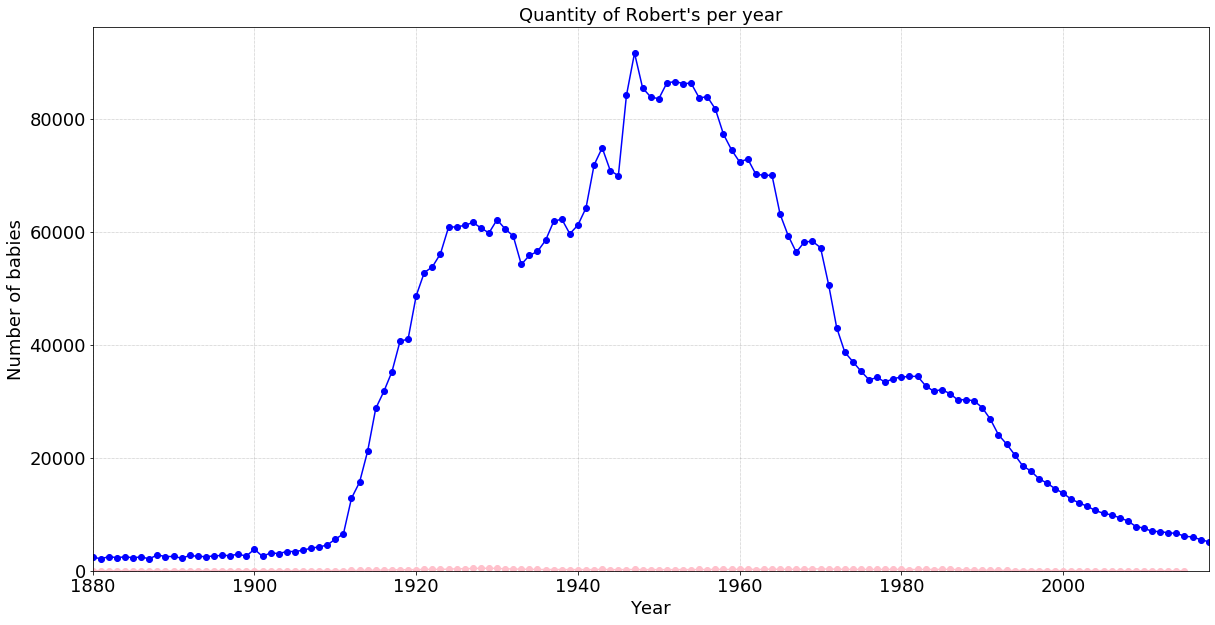

In [51]:
# plt.ioff() # this prevents the plots from rendering below

fig, ax = plt.subplots()

if not df_onename[0].empty:
    ax = df_onename[0].plot(x = "Year", y = "Quantity", 
                                 figsize=(20,10), fontsize=18, 
                                 legend = False, ax=ax, 
                                 linestyle='-', marker='o', color='blue')
if not df_onename[1].empty:
    df_onename[1].plot(x = "Year", y = "Quantity", 
                                 figsize=(20,10), fontsize=18, 
                                 legend = False, ax=ax, 
                                 linestyle='-', marker='o', color='pink')
# ax.minorticks_on()
ax.set_title('Quantity of '+ n +"'s per year", fontsize=18)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Number of babies", fontsize=18)
ax.figure.savefig(n + 'sPerYear.png', format = "PNG")
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='x' )
ax.grid('on', which='minor', axis='y' )
ax.grid('on', which='major', axis='y' )
ax.set_ylim(ymin=0)
print('done')


# df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', ax=ax)

# # Don't allow the axis to be on top of your data
# ax.set_axisbelow(True)

# # Turn on the minor TICKS, which are required for the minor GRID
# ax.minorticks_on()

# # Customize the major grid
ax.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
# # Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

## Least popular boy baby names

In [31]:
yr_beg = 2017
yr_end = 2018
g = 'M'
df_lp_yrs = list(range(yr_beg, yr_end+1)) # year range to sort thru for least popular names
# print('Year range to investigate:')
# print(df_lp_yrs)
# print()

df_lp = pd.DataFrame()
for year in df_lp_yrs:
    df_lp = pd.concat([df_lp, df.loc[(df['Gender'] == g) & (df['Quantity'] == 5) & (df['Year'] == year)]], ignore_index = True) 
export_csv = df_lp.to_csv('LeastPopular_'+ g + '_NamesFrom' + str(yr_beg) + 'to' + str(yr_end) + 'sortedByYear.csv', index = None, header=True) 
# print('Names given to only 5 babies in the years ' + str(yr_beg) + ' to ' + str(yr_end) + ':')
# print(df_lp)
# print()

## Sort by name
df_lp_sorted_by_name = df_lp.sort_values(['Name'], ascending=True)
print('Names sorted by the name:')
print(df_lp_sorted_by_name)
print()
export_csv = df_lp_sorted_by_name.to_csv('LeastPopular_'+ g + '_NamesFrom' + str(yr_beg) + 'to' + str(yr_end) + 'sortedByName.csv', index = None, header=True) 

## Combine repeated names and sum up the total
df_lp_tot = df_lp.groupby(['Name'])['Quantity'].sum().to_frame(name = 'Quantity').reset_index()
print('Least common names across year range summed together.')
print('So if a name was given to 5 babies for multiple years, the sum should be presented:')
print(df_lp_tot)
print()

# df_lp_tot.head()
# Reduce list down to those will only 5 across all years
df_lp_tot_min = df_lp_tot.loc[(df_lp_tot['Quantity'] == 5)].reset_index()
print('Final list of least common names given across the year range:')
print(df_lp_tot_min)
export_csv = df_lp_tot_min.to_csv('LeastPopular_'+ g + '_NamesFrom' + str(yr_beg) + 'to' + str(yr_end) + '.csv', index = None, header=True) 

## Reduce list down to those only starting with J
name_start = 'J'
df_lp_tot_min_name_start = df_lp_tot_min[df_lp_tot_min['Name'].str.match(name_start)]
print('Final list of least common names given across year range starting with the letter: ' + name_start )
print(df_lp_tot_min_name_start)
export_csv = df_lp_tot_min_name_start.to_csv('LeastPopular_'+ g + '_NamesFrom' + str(yr_beg) + 'to' + str(yr_end) + 'StartingWithTheLetter' + name_start + '.csv', index = None, header=True) 


# data["College"].str.startswith(search) 

Names sorted by the name:
        Name Gender  Quantity  Year
2006   Aabir      M         5  2018
0     Aadrit      M         5  2017
1      Aagam      M         5  2017
2007   Aagam      M         5  2018
2     Aaidyn      M         5  2017
...      ...    ...       ...   ...
3927   Zyran      M         5  2018
3928   Zyrie      M         5  2018
2005   Zyrie      M         5  2017
3929   Zyron      M         5  2018
3930   Zzyzx      M         5  2018

[3931 rows x 4 columns]

Least common names across year range summed together.
So if a name was given to 5 babies for multiple years, the sum should be presented:
         Name  Quantity
0       Aabir         5
1      Aadrit         5
2       Aagam        10
3      Aaidyn         5
4     Aakarsh         5
...       ...       ...
3702    Zylis         5
3703    Zyran         5
3704    Zyrie        10
3705    Zyron         5
3706    Zzyzx         5

[3707 rows x 2 columns]

Final list of least common names given across the year range:
  

In [9]:
import pandas as pd

# National Data
natdata = pd.read_csv('namesnational/yob1880.txt')
natdata = pd.read_csv('namesnational/yob1881.txt')

# State Data
statedata = pd.read_csv('namesbystate/AK.txt')
statedata2 = pd.read_csv('namesbystate/AL.txt')

# Territory Data
terrdata = pd.read_csv('namesbyterritory/PR.txt')
terrdata2 = pd.read_csv('namesbyterritory/TR.txt')

natdata.head()
#statedata.head()
#terrdata.head()

,Mary,F,6919
0,Anna,F,2698
1,Emma,F,2034
2,Elizabeth,F,1852
3,Margaret,F,1658
4,Minnie,F,1653
